In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

In [2]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

In [3]:
dense_layers = [0]
layer_sizes = [64]
conv_layers = [3]

In [4]:
for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

3-conv-64-nodes-0-dense-1610301818


In [5]:
model = Sequential()

model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

for l in range(conv_layer-1):
    model.add(Conv2D(layer_size, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

for _ in range(dense_layer):
    model.add(Dense(layer_size))
    model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [6]:
tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
              )

In [9]:
import numpy as np
y = np.array(y)

In [ ]:
model.fit(X, y,
          batch_size=32,
          epochs=10,
          validation_split=0.3,
          callbacks=[tensorboard])

In [10]:
model.save('64x3-CNN.model')

INFO:tensorflow:Assets written to: 64x3-CNN.model\assets


In [11]:
import cv2
import tensorflow as tf

In [12]:
CATEGORIES = ["Dog", "Cat"]  # will use this to convert prediction num to string value

In [13]:
def prepare(filepath):
    IMG_SIZE = 70  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # return the image with shaping that TF wants.

In [14]:
model = tf.keras.models.load_model("64x3-CNN.model")

In [ ]:
prediction = model.predict([prepare(r"C:\Users\samer\Desktop\Machine Learning\Deep Learning basics with TensorFlow - Sentex\dog.jpg")])  # REMEMBER YOU'RE PASSING A LIST OF THINGS YOU WISH TO PREDICT

In [ ]:
prediction[0][0]

In [ ]:
print(CATEGORIES[int(prediction[0][0])])

In [ ]:
prediction = model.predict([prepare(r'C:\Users\samer\Desktop\Machine Learning\Deep Learning basics with TensorFlow - Sentex\cat.jpg')])
print(prediction)  # will be a list in a list.
print(CATEGORIES[int(prediction[0][0])])

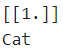